In [2]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:/Datasets')

conc = pd.read_csv('Concrete_Data.csv')
conc

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
x = conc.drop(['Strength'], axis=True)
y = conc['Strength']

In [6]:
# Split the dataset into training and testing sets
# x and y are the feature and target variables, respectively
# test_size=0.3 means 30% of the data will be used for testing
# random_state=24 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

# Create a Decision Tree Regressor model
# random_state=24 sets the random seed for reproducibility
# max_depth=2 limits the maximum depth of the decision tree to 2 levels
dtr = DecisionTreeRegressor(random_state=24, max_depth=2)

# Train the Decision Tree Regressor model on the training data
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=24)

# tree plot

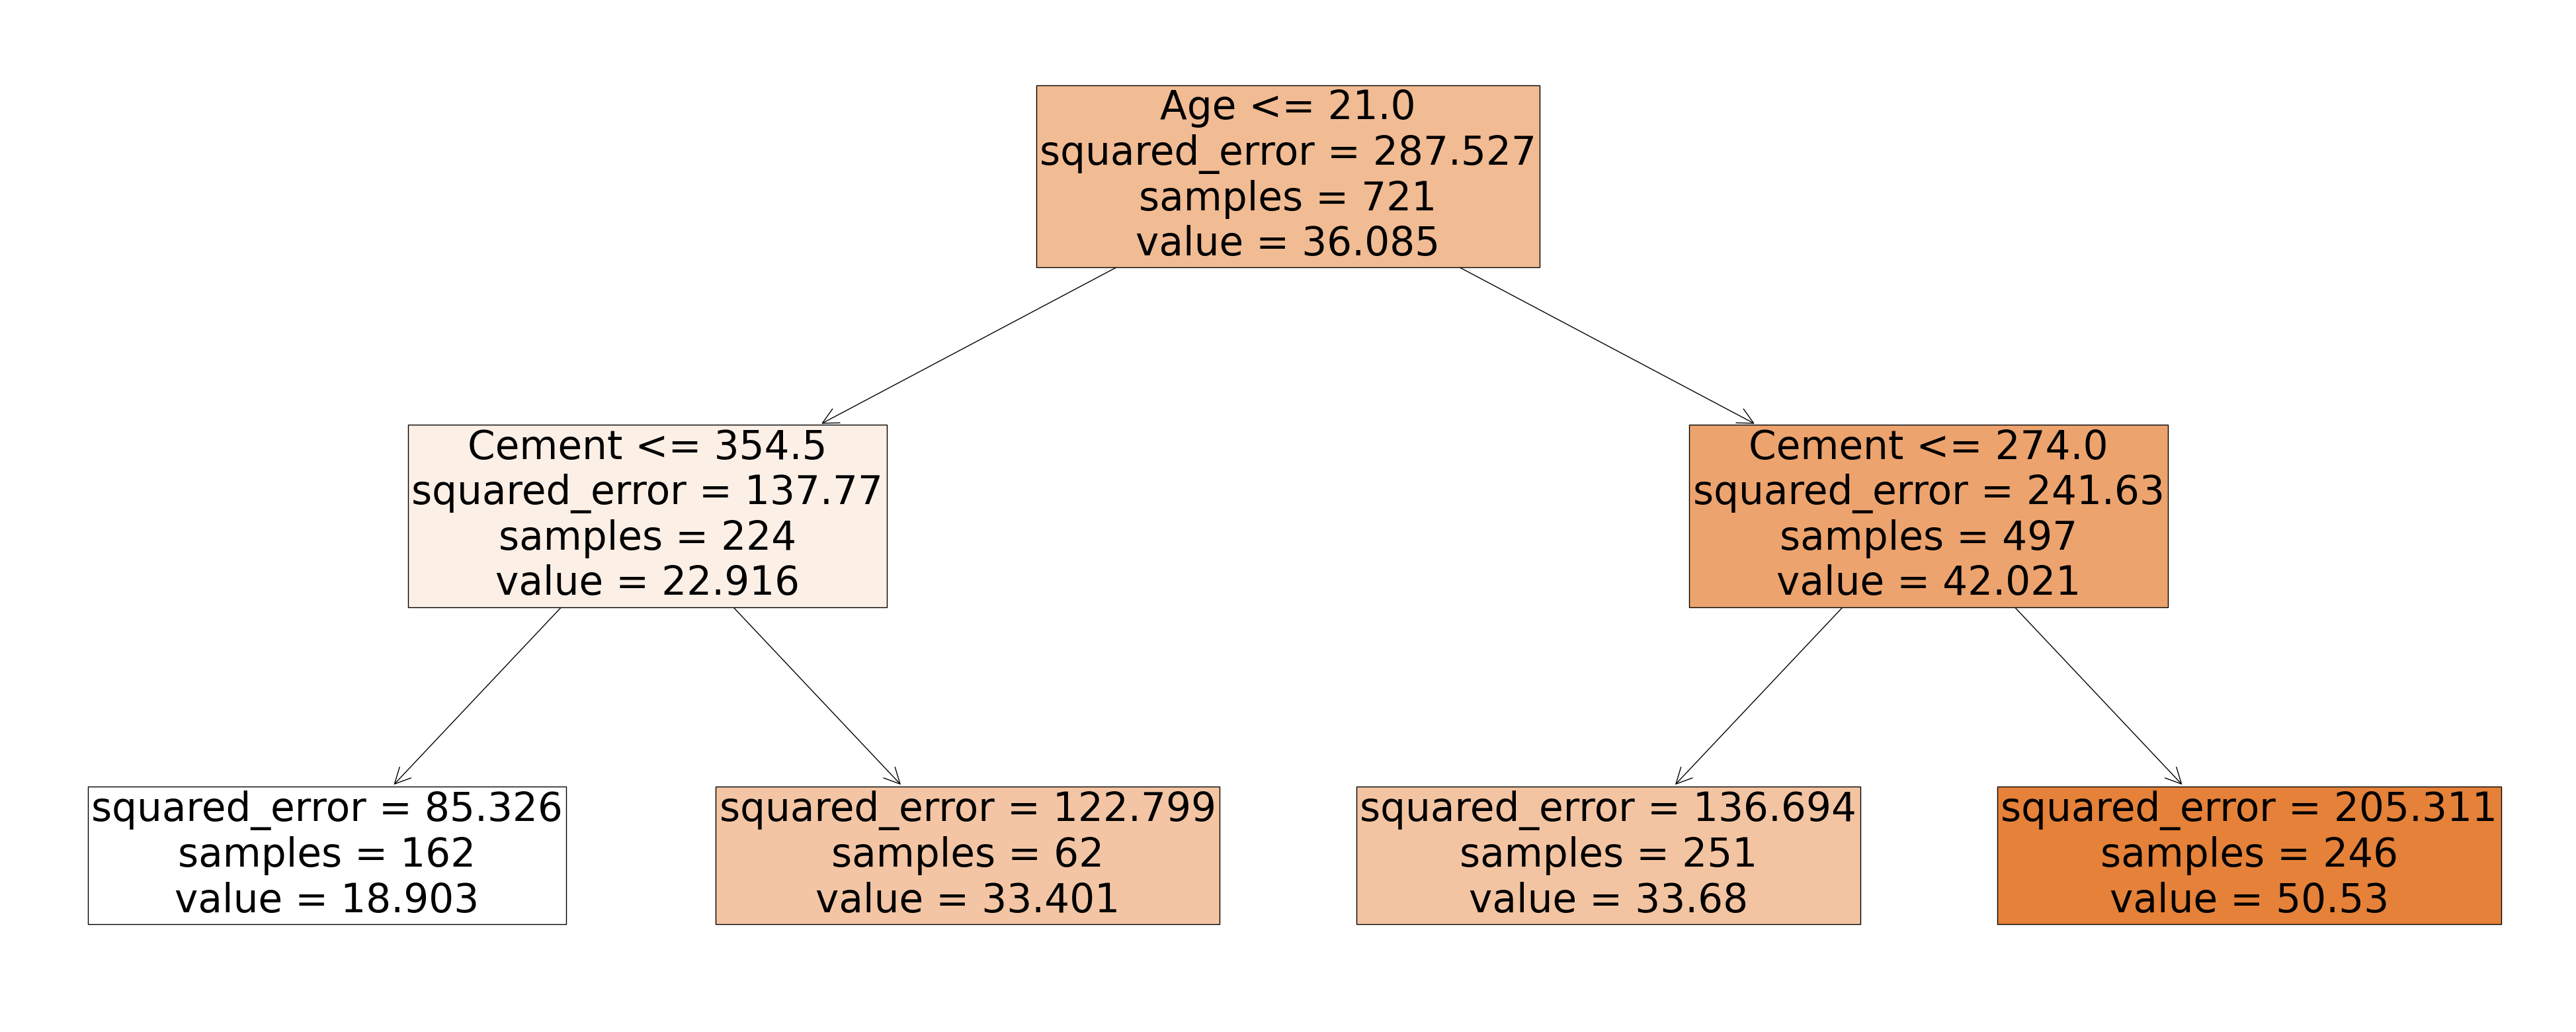

In [7]:
# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(50, 20))

# Plot the decision tree
# dtr is the trained Decision Tree Regressor model
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree (not applicable for regression)
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(dtr, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

In [8]:
# Use the trained Decision Tree Regressor model to make predictions on the test data
y_pred = dtr.predict(x_test)

# Calculate the R-squared (coefficient of determination) score
# y_test is the true target values
# y_pred is the predicted target values
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(r2)

0.3669221447199047


# gridsearch

In [9]:
# Define the hyperparameter grid for the Decision Tree Regressor
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a 5-fold cross-validation object with shuffling and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Regressor model with a random state of 24
dtr = DecisionTreeRegressor(random_state=24)

# Create a GridSearchCV object to perform hyperparameter tuning
# dtr is the base estimator
# param_grid=params is the hyperparameter grid to search
# cv=kfold is the cross-validation object
gcv = GridSearchCV(dtr, param_grid=params, cv=kfold)

# Fit the GridSearchCV object to the data
gcv.fit(x, y)

# Print the best hyperparameters found by the grid search
print(gcv.best_params_)

# Print the best score (R-squared) achieved by the grid search
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.8546885426089814


# best tree

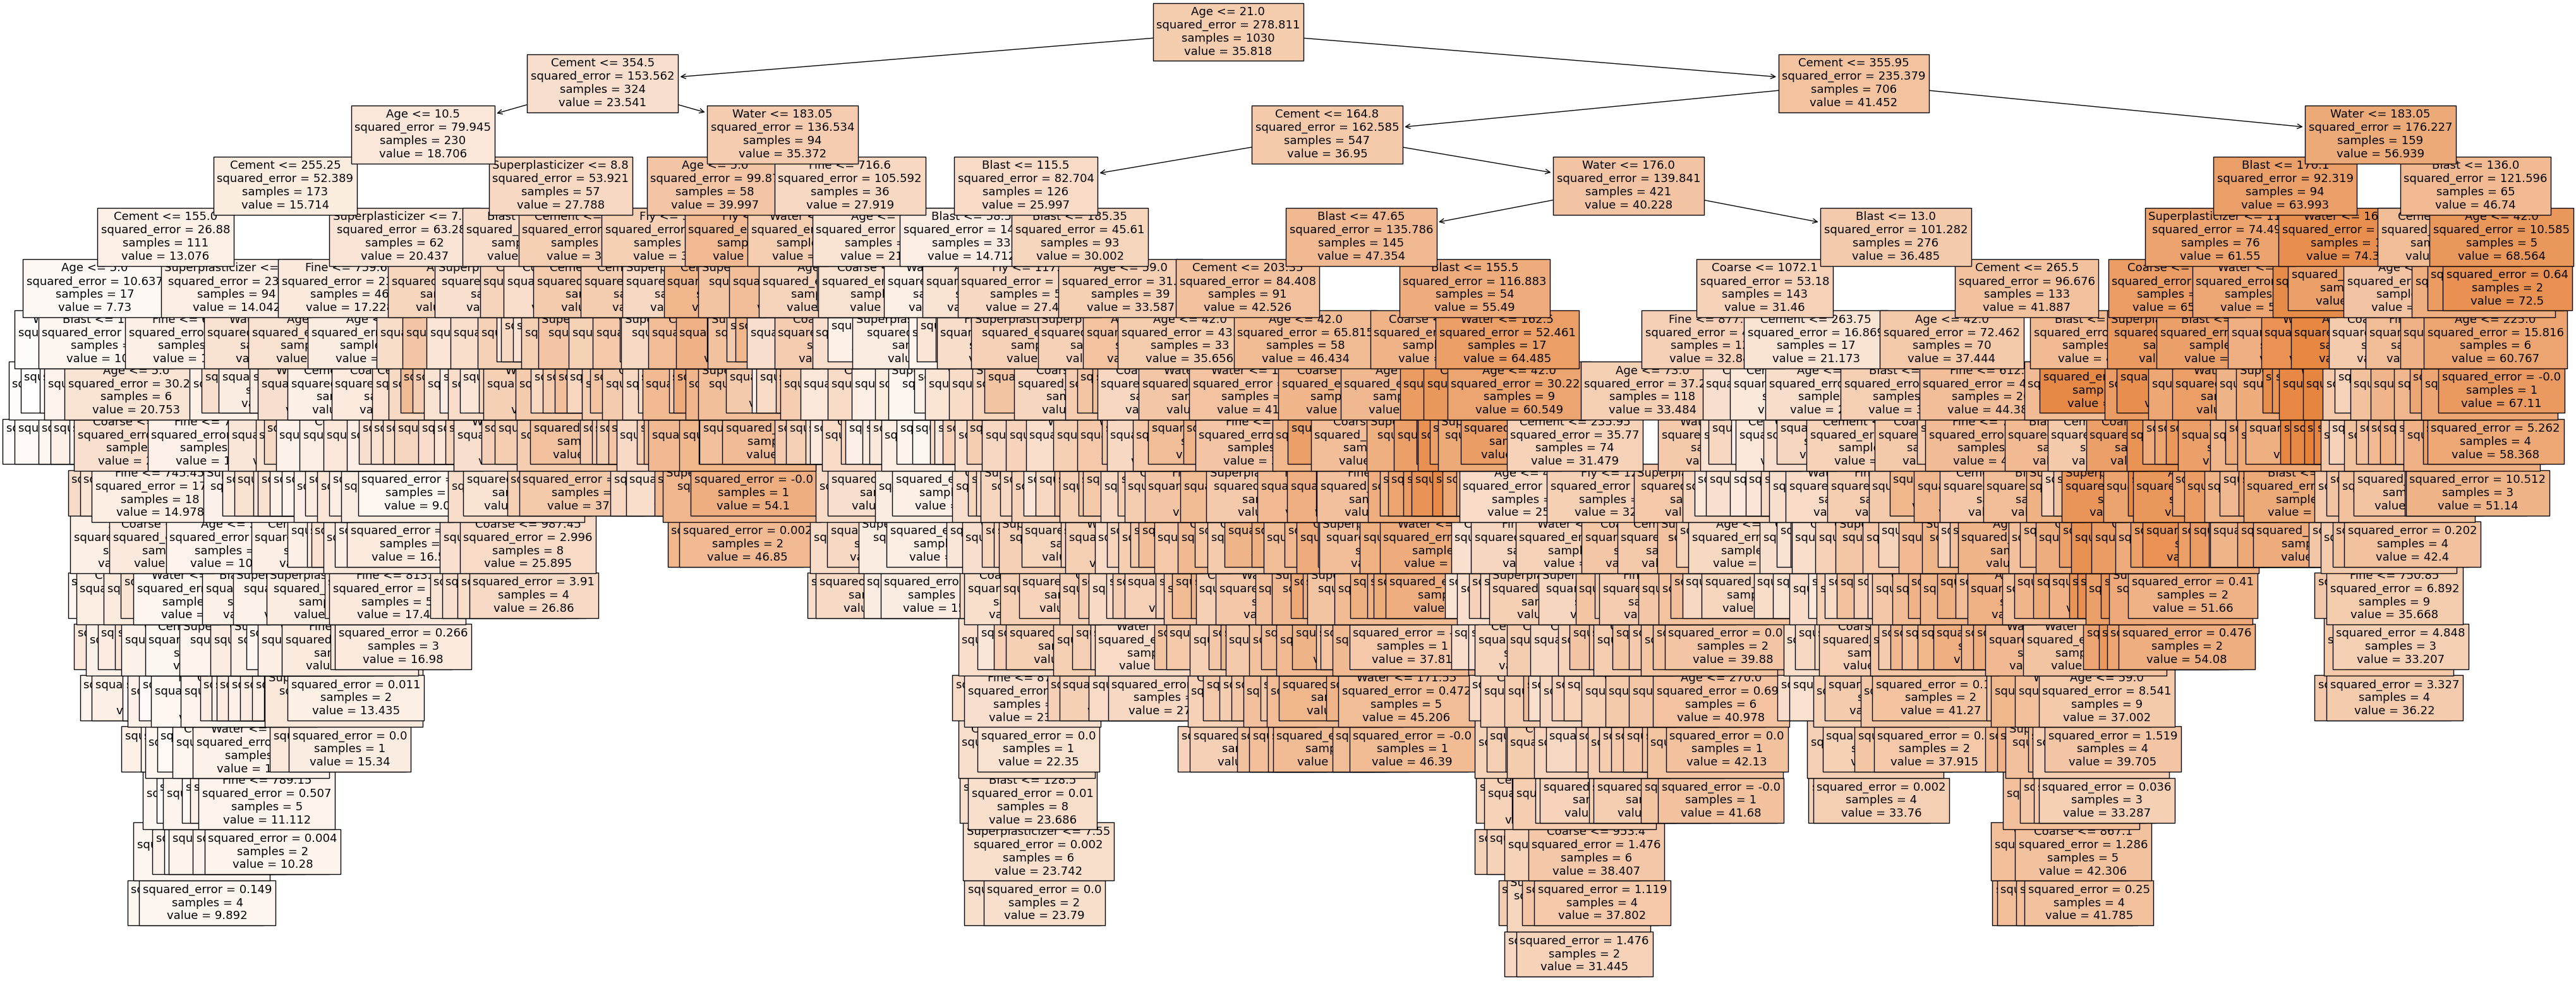

In [10]:
# Get the best estimator (Decision Tree Regressor) from the GridSearchCV object
best_tree = gcv.best_estimator_

# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(50, 20))

# Plot the best decision tree
# best_tree is the best estimator found by the GridSearchCV
# feature_names=x.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree (not applicable for regression)
# filled=True fills the tree nodes with colors
# fontsize=13 sets the font size for the tree
plot_tree(best_tree, feature_names=x.columns, class_names=['0', '1'], filled=True, fontsize=13)

# Display the plot
plt.show()

# feature impotance plot

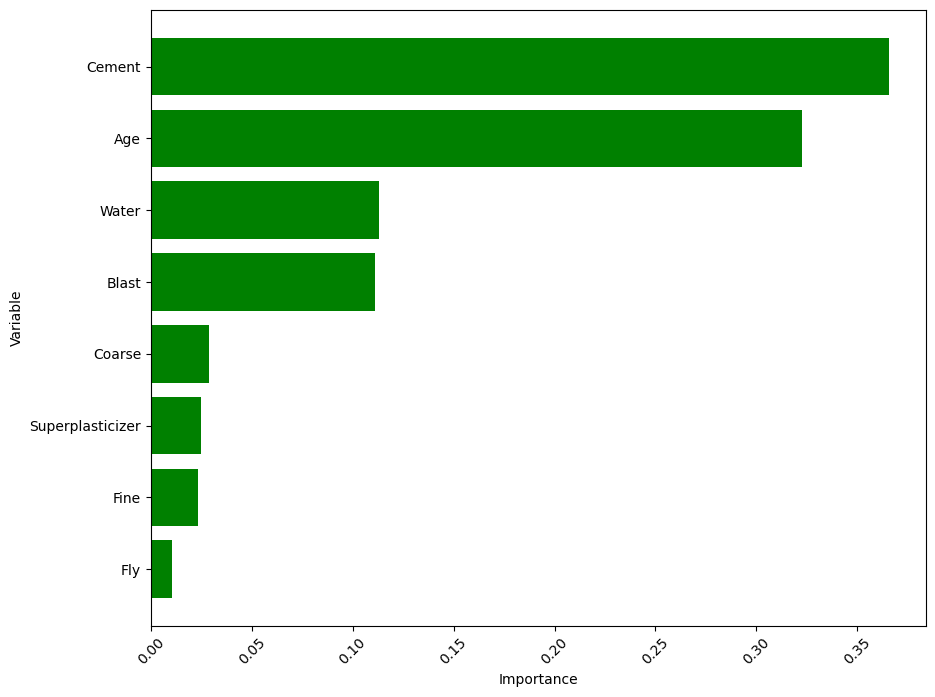

In [11]:
# Create a pandas DataFrame with the feature names and importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the feature importances in ascending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(10, 8))
plt.barh(pd_imp['var'], pd_imp['imp'], color='g')

# Set the x-axis label
plt.xlabel('Importance')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Variable')

# Display the plot
plt.show()